# The Project
Sports clothing and athleisure attire is a huge industry, worth approximately $193 billion in 2021 with a strong growth forecast over the next decade!

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.

You've been provided with four datasets to investigate:

---------------------------------------------------------------------------------------------------------------------------------------
La ropa deportiva y la vestimenta deportiva son una industria enorme, con un valor aproximado de 193 mil millones de dólares en 2021, ¡y se prevé un fuerte crecimiento durante la próxima década!

En este cuaderno, asumirá el papel de analista de productos para una empresa de ropa deportiva en línea. La empresa está específicamente interesada en cómo puede mejorar los ingresos. Profundizará en los datos de los productos, como precios, reseñas, descripciones y calificaciones, así como en los ingresos y el tráfico del sitio web, para generar recomendaciones para sus equipos de marketing y ventas.

Se le han proporcionado cuatro conjuntos de datos para investigar:

In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Exercise

In order to complete the project you will need to merge the datasets and drop null values, along with answering the questions below.

What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

Label products priced up to quartile one as "Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite".
Store as a pandas DataFrame called adidas_vs_nike containing the following columns: "brand", "price_label", "num_products", and "mean_revenue". All numeric values should be rounded to two decimal places.

Do any differences exist between the word count of a product's description and its mean rating?

Split product description length into bins of 100 characters and calculate the average rating and number of reviews.
Store the results as a pandas DataFrame called description_lengths containing the following columns: "description_length", "mean_rating", "num_reviews", again rounding numeric values to two decimal places.

How does the volume of products and median revenue vary between clothing and footwear?

Search "description" for "shoe*", "trainer*", or "foot*" and use the results to calculate the number of footwear products versus clothing products sold by the company and the median revenue for each of the two product types.
Create a pandas DataFrame called product_types containing the following columns: "num_clothing_products", "median_clothing_revenue", "num_footwear_products", "median_footwear_revenue".

--------------------------------------------------------------------------------------------------------------------------------------


Para completar el proyecto, deberá fusionar los conjuntos de datos y eliminar los valores nulos, además de responder las preguntas a continuación.

¿Cuál es el volumen de productos y los ingresos promedio de los productos Adidas y Nike según los cuartiles de precios?

* Etiquete los productos con precios hasta el cuartil uno como "Presupuesto", el cuartil dos como "Promedio", el cuartil tres como "Caro" y el cuartil cuatro como "Élite".

* Almacene como un DataFrame de pandas llamado adidas_vs_nike que contiene las siguientes columnas: "marca", "etiqueta de precio", "num_productos" y "ingresos_medios". Todos los valores numéricos deben redondearse a dos decimales.

¿Existe alguna diferencia entre el número de palabras de la descripción de un producto y su calificación media?

* Divida la longitud de la descripción del producto en grupos de 100 caracteres y calcule la calificación promedio y el número de reseñas.
* Almacene los resultados como un DataFrame de pandas llamado descripción_longitudes que contiene las siguientes columnas: "descripción_longitud", "mean_rating", "num_reviews", nuevamente redondeando los valores numéricos a dos decimales.

¿Cómo varía el volumen de productos y el ingreso medio entre ropa y calzado?

* Busque "descripción" para "zapato*", "entrenador*" o "pie*" y utilice los resultados para calcular la cantidad de productos de calzado versus productos de ropa vendidos por la empresa y los ingresos medios para cada uno de los dos tipos de productos.
* Cree un DataFrame de pandas llamado product_types que contenga las siguientes columnas: "num_clothing_products", "median_clothing_revenue", "num_footwear_products", "median_footwear_revenue".

In [50]:
#read in the data 

file_1 = 'brands.csv'
file_2 = 'finance.csv'
file_3 = 'info.csv'
file_4 ='reviews.csv'

brands = pd.read_csv(file_1)
finanance = pd.read_csv(file_2)
information = pd.read_csv(file_3)
rev = pd.read_csv(file_4)

print(brands.info())
print(finanance.info())
print(information.info())
print(rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3120 n

### Data cleaning and Fusion

In [41]:
#merge  the data and drop null values 

parte_uno = brands.merge(finanance, on='product_id')
parte_dos = information.merge(rev, on='product_id')
df= parte_uno.merge(parte_dos, on='product_id')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   brand          3120 non-null   object 
 2   listing_price  3120 non-null   float64
 3   sale_price     3120 non-null   float64
 4   discount       3120 non-null   float64
 5   revenue        3120 non-null   float64
 6   product_name   3120 non-null   object 
 7   description    3117 non-null   object 
 8   rating         3120 non-null   float64
 9   reviews        3120 non-null   float64
dtypes: float64(6), object(4)
memory usage: 248.5+ KB


In [42]:
#valores nulos
df.dropna(inplace=True)


### Prices according to Quartiles Nike vs Adidas
What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

--------------------------------------------------------------
Precios según Cuartiles Nike vs. Adidas
¿Cuál es el volumen de productos y los ingresos promedio de los productos Adidas y Nike según los cuartiles de precios?

In [43]:
#df['price_label'] = pd.qcut(df['listing_price'], q=4, labels=['Budget', 'Average', 'Expensive', 'Elite'])

df["price_label"] = pd.qcut(df["listing_price"], q=4, labels=["Budget", "Average", "Expensive", "Elite"])


In [44]:
adidas_vs_nike = df.groupby(['brand', 'price_label'], as_index=False, observed=False).agg(num_products=('price_label','count'),mean_revenue = ('revenue', 'mean')).round(2)
adidas_vs_nike

,brand,price_label,num_products,mean_revenue
0,Adidas,Budget,574,2015.68
1,Adidas,Average,655,3035.30
2,Adidas,Expensive,759,4621.56
3,Adidas,Elite,587,8302.78
4,Nike,Budget,357,1596.33
5,Nike,Average,8,675.59
6,Nike,Expensive,47,500.56
7,Nike,Elite,130,1367.45


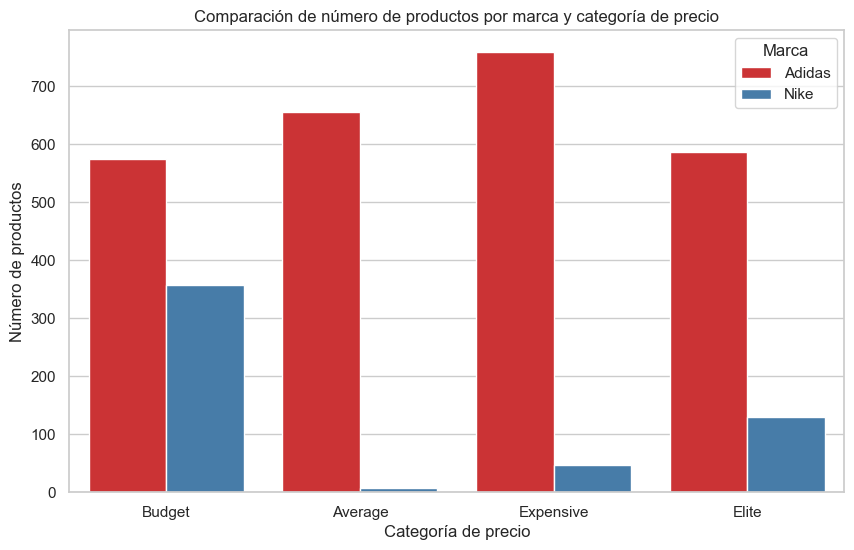

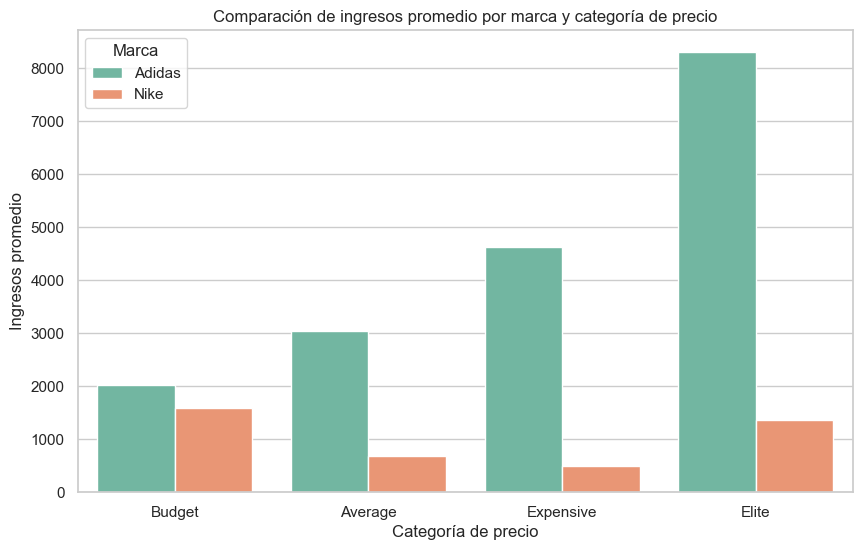

In [45]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x="price_label", y="num_products", hue="brand", data=adidas_vs_nike, palette="Set1")
plt.title('Comparación de número de productos por marca y categoría de precio')
plt.xlabel('Categoría de precio')
plt.ylabel('Número de productos')
plt.legend(title='Marca')
plt.show()

# Crear el gráfico de barras agrupadas para ingresos promedio
plt.figure(figsize=(10, 6))
sns.barplot(x="price_label", y="mean_revenue", hue="brand", data=adidas_vs_nike, palette="Set2")
plt.title('Comparación de ingresos promedio por marca y categoría de precio')
plt.xlabel('Categoría de precio')
plt.ylabel('Ingresos promedio')
plt.legend(title='Marca')
plt.show()


Worked with Sting

---------------------------------------------------------
Trabajó con Sting
¿Existe alguna diferencia entre el número de palabras de la descripción de un producto y su calificación media?

In [46]:
#trabajo con string

df['description_len'] = df['description'].str.len()

lengthes = [0,100,200,300,400,500,600,700]
#crear una lista
#limits=[ 100, 200, 300,400,'500','600','700'] Me daba advertencia poruqe lo estaba pasando como cadena 


limits = [100, 200, 300, 400, 500, 600, 700]
#en este caso daba error porque necesita utilizar loc

df.loc[:, 'description_len'] = pd.cut(df['description_len'], bins=lengthes, labels=limits) #include_lowest=True)


In [51]:

description_lengths = df.groupby('description_len', as_index=False).agg(mean_rating=('rating', 'mean'), num_reviews=('reviews', 'count')).round(2)

description_lengths

,description_len,mean_rating,num_reviews
0,100,2.26,7
1,200,3.19,526
2,300,3.28,1785
3,400,3.29,651
4,500,3.35,118
5,600,3.12,15
6,700,3.65,15


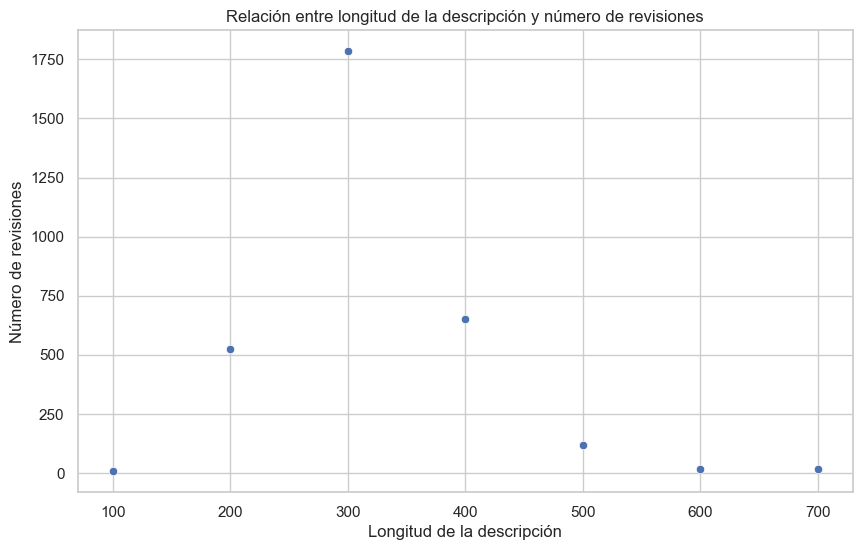

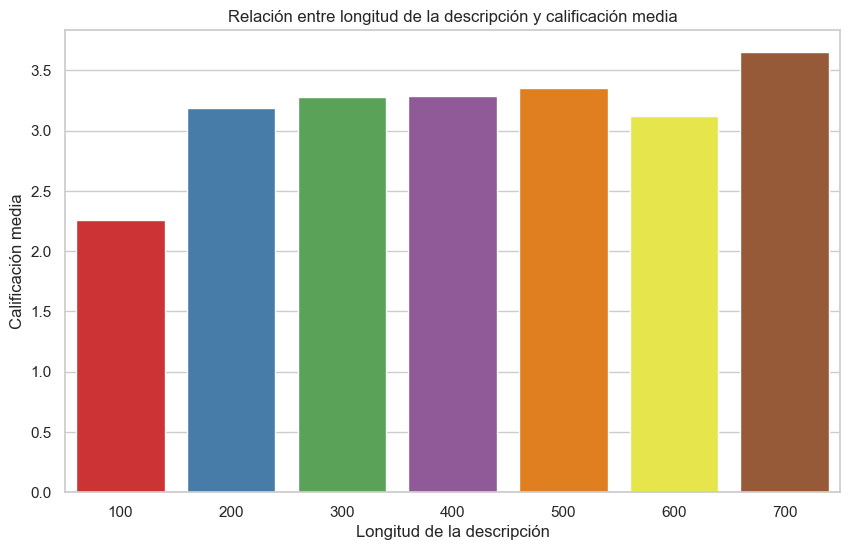

In [53]:

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para la relación entre longitud de la descripción y número de revisiones
plt.figure(figsize=(10, 6))
sns.scatterplot(x="description_len", y="num_reviews", data=description_lengths)
plt.title('Relación entre longitud de la descripción y número de revisiones')
plt.xlabel('Longitud de la descripción')
plt.ylabel('Número de revisiones')
plt.show()

# Crear el gráfico de barras para la relación entre longitud de la descripción y calificación media
plt.figure(figsize=(10, 6))
sns.barplot(x="description_len", y="mean_rating", hue="description_len", data=description_lengths, palette="Set1", legend=False)
plt.title('Relación entre longitud de la descripción y calificación media')
plt.xlabel('Longitud de la descripción')
plt.ylabel('Calificación media')
plt.show()


In [48]:
myList= 'shoe*|trainer*|foot*' 

shoes= df[df['description'].str.contains(myList)]

shoes.head()


,product_id,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews,price_label,description_len
1,G27341,Adidas,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0,Expensive,200
2,CM0081,Adidas,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0,Budget,200
3,B44832,Adidas,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0,Expensive,300
4,D98205,Adidas,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0,Expensive,300
5,B75586,Adidas,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0,Average,300
